<a href="https://colab.research.google.com/github/sathvikb007/Image-Clustering-with-Autoencoders/blob/branch1/2_deepAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Deep Autoencoder***

The model below emulates a deep autoencoder. The encoder consists of 4 hidden layers of 512, 256, 128 and 64 nodes sequentially. The bottleneck layer, consisting of 49 nodes, contains the encoded image of dimensions 7 x 7.

In [1]:
#Importing the required libraries

from keras.callbacks import Callback
from keras.layers import *
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras import regularizers
from keras import optimizers
from keras.optimizers import RMSprop
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np
import tensorflow as tf


Using TensorFlow backend.


In [0]:
#Loading the fashion MNIST dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#Normalizing the data

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
# autoencoder model

input_img = Input(shape=(784,))
encoded1 = Dense(512, activation='elu')(input_img)
encoded1 = BatchNormalization()(encoded1)
encoded2 = Dense(256, activation='elu')(encoded1)
encoded2 = BatchNormalization()(encoded2)
encoded3 = Dense(128, activation='elu')(encoded2)
encoded3 = BatchNormalization()(encoded3)
encoded4 = Dense(64, activation='elu')(encoded3)
encoded4 = BatchNormalization()(encoded4)
encoded5 = Dense(49, activation='elu')(encoded4)
encoded5 = BatchNormalization()(encoded5)

encoder = Model(input_img, encoded5)   # contains the encoded representation of the input



decoded1 = Dense(64, activation='elu')(encoded5)
decoded1 = BatchNormalization()(decoded1)
decoded2 = Dense(128, activation='elu')(decoded1)
decoded2 = BatchNormalization()(decoded2)
decoded3 = Dense(256, activation='elu')(decoded2)
decoded3 = BatchNormalization()(decoded3)
decoded4 = Dense(512, activation='elu')(decoded3)
decoded4 = BatchNormalization()(decoded4)
decoded5 = Dense(784, activation='sigmoid')(decoded4)


In [5]:
autoencoder = Model(input_img, decoded5)
autoencoder.compile(optimizer = 'adadelta', loss='mean_squared_error')

In [6]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

In [7]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

In [8]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history = LossHistory()


autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks = [history])




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 16s 269us/step - loss: 0.1263 - val_loss: 0.1029
Epoch 2/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0842 - val_loss: 0.0642
Epoch 3/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0494 - val_loss: 0.0381
Epoch 4/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.0336 - val_loss: 0.0298
Epoch 5/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.0283 - val_loss: 0.0263
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.0258 - val_loss: 0.0245
Epoch 7/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0243 - val_loss: 0.0233
Epoch 8/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0233 - val_loss: 0.0224
Epoch 9/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0225 - val

Text(0, 0.5, 'mean squared error')

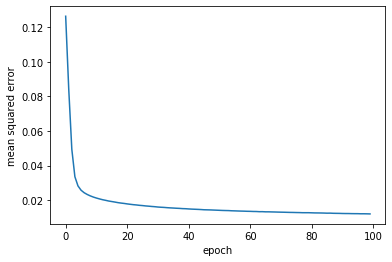

In [9]:
#To plot loss vs epoch

plt.plot(list(range(len(history.losses))), history.losses)
plt.xlabel('epoch')
plt.ylabel('mean squared error')

After training for 100 epochs, we see that the reconstruction loss for a deep autenocoder is less than that for a simple autoencoder.

In [0]:
DAE_encoded_imgs_train = encoder.predict(x_train)              #contains all the encoded images of the training set
DAE_decoded_imgs_train = autoencoder.predict(x_train)          #contains all the reconstructed images of the training set

DAE_encoded_imgs_test = encoder.predict(x_test)                #contains all the encoded images of the test set
DAE_decoded_imgs_test = autoencoder.predict(x_test)            #contains all the reconstructed images of the test set

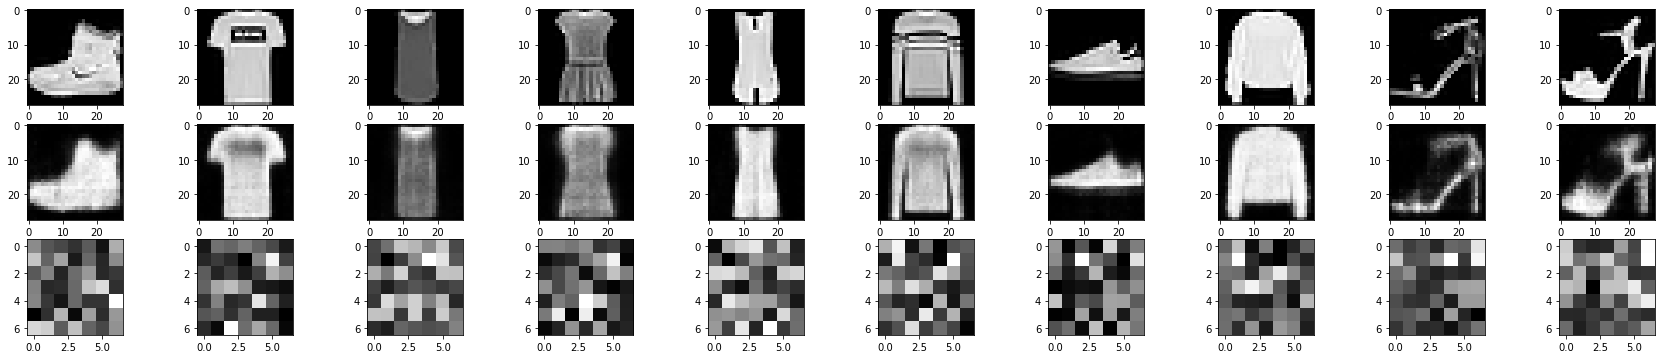

In [11]:
n = 10  
plt.figure(figsize=(30,6))
for i in range(n):

    # display original image

    ax = plt.subplot(3, n, i + 1)
    plt.gray()
    plt.imshow(x_train[i].reshape(28, 28))
    
    

    # display reconstruction of the image

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(DAE_decoded_imgs_train[i].reshape(28, 28))

    #display latent representation

    ax = plt.subplot(3, n, i+1+ n*2)
    plt.imshow(DAE_encoded_imgs_train[i].reshape(7,7))
   
plt.show()

In [0]:
# Standardizing the encoded data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(DAE_encoded_imgs_train)
X_test  = sc.transform(DAE_encoded_imgs_test)

In [0]:
#Clustering the data into 10 classes with the encoded data

from sklearn.cluster import KMeans
DAEkmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)

In [0]:
yPredtrain = DAEkmeans.predict(X_train)
yPredtest = DAEkmeans.predict(X_test)

In [15]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_train.reshape(60000,).tolist(), yPredtrain.tolist()))
print(metrics.adjusted_rand_score(y_test.reshape(10000,).tolist(), yPredtest.tolist()))

0.35769873838160754
0.3520414679361676


In [16]:
from sklearn.metrics import normalized_mutual_info_score
print(normalized_mutual_info_score(y_train, yPredtrain))
print(normalized_mutual_info_score(y_test, yPredtest))

0.5530968519344244
0.5486400083586368


The ARI and NMI after clustering , using a deep autoencoder is higher than that of a simple autoencoder. This means that the deep autoencoder has learnt a better representation of the original image than the simple autoencoder.